In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_json('data/data.json')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [54]:
df.user_created

0        1259613950
1        1280942776
2        1272559388
3        1283870102
4        1288984065
5        1268579110
6        1233437951
7        1288276103
8        1294428121
9        1288276103
10       1231436612
11       1258180664
12       1225799820
13       1255857361
14       1279046075
15       1264709634
16       1264709634
17       1297479866
18       1236178830
19       1297470242
20       1297501981
21       1264487280
22       1259603019
23       1259786059
24       1289584604
25       1252729123
26       1295576777
27       1277913245
28       1279136852
29       1228711936
            ...    
14307    1308777954
14308    1326959165
14309    1328868816
14310    1355437639
14311    1358378426
14312    1358277129
14313    1308699612
14314    1290081059
14315    1332158693
14316    1358948648
14317    1294615173
14318    1358975276
14319    1327327750
14320    1359114737
14321    1264635720
14322    1359232544
14323    1342086238
14324    1339442907
14325    1359415820


In [55]:
# # iterate through all columns and extract the unique values in each column
# for col in df.columns:
#     vals = df[col].unique()
    
#     if len(vals) < 35:
#         print(col)
#         print(vals)
#     else:
#         print(col +': '+str(len(vals))+' unique values')

In [56]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [57]:
def fraud(string):
    if 'fraud' in string:
        return True
    else:
        return False

In [58]:
df['fraud'] = df.acct_type.apply(lambda x: fraud(x))

In [59]:
fraud_df = df[df['fraud']==True]
nofraud_df = df[df['fraud']==False]

In [60]:
df['fraud'].value_counts()[1] / (df['fraud'].value_counts()[1] + df['fraud'].value_counts()[0])

0.09018623142916929

In [61]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

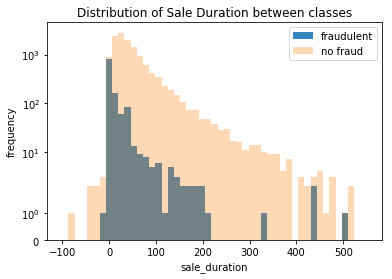

In [62]:
fraud = fraud_df['sale_duration']
nofraud = nofraud_df['sale_duration']
bins = np.linspace(-100,550)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('sale_duration')
plt.ylabel('frequency')
plt.title('Distribution of Sale Duration between classes')
plt.show()
# plt.savefig('img/inpatient_visits.png')

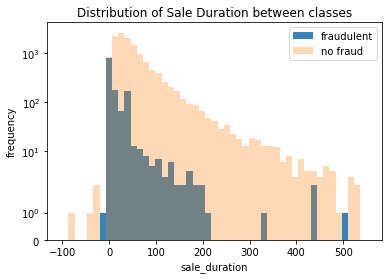

In [63]:
fraud = fraud_df['sale_duration2']
nofraud = nofraud_df['sale_duration2']
bins = np.linspace(-100,550)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('sale_duration')
plt.ylabel('frequency')
plt.title('Distribution of Sale Duration between classes')
plt.show()
# plt.savefig('img/inpatient_visits.png')

In [64]:
print('Average sale duration for fraudulent cases: ' + str(fraud_df.sale_duration.mean()))
print('Average sale duration for non fraudulent cases: ' + str(nofraud_df.sale_duration.mean()))

Average sale duration for fraudulent cases: 14.12595744680851
Average sale duration for non fraudulent cases: 49.827631275467056


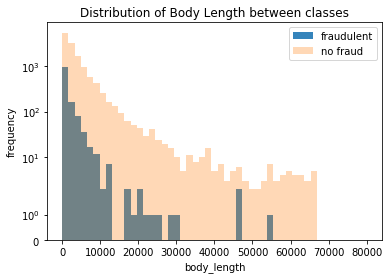

In [65]:
fraud = fraud_df['body_length']
nofraud = nofraud_df['body_length']
bins = np.linspace(0,80000)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('body_length')
plt.ylabel('frequency')
plt.title('Distribution of Body Length between classes')
plt.show()

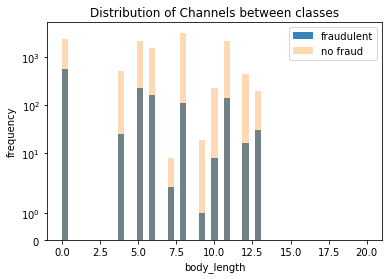

In [66]:
fraud = fraud_df['channels']
nofraud = nofraud_df['channels']
bins = np.linspace(0,20)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('body_length')
plt.ylabel('frequency')
plt.title('Distribution of Channels between classes')
plt.show()

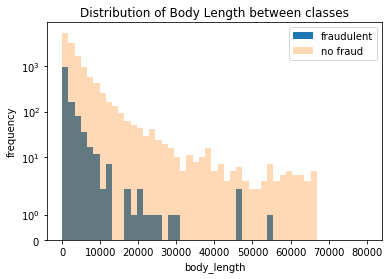

In [92]:
fraud = fraud_df['body_length']
nofraud = nofraud_df['body_length']
bins = np.linspace(0,80000)
plt.hist(fraud, bins, alpha=1, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('body_length')
plt.ylabel('frequency')
plt.title('Distribution of Body Length between classes')
plt.show()

In [68]:
df.fb_published.value_counts()

0    12510
1     1827
Name: fb_published, dtype: int64

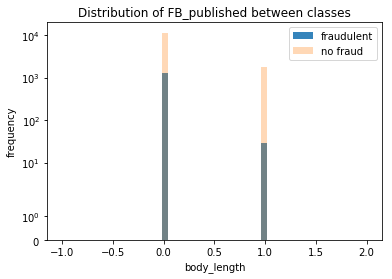

In [69]:
fraud = fraud_df['fb_published']
nofraud = nofraud_df['fb_published']
bins = np.linspace(-1,2)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('body_length')
plt.ylabel('frequency')
plt.title('Distribution of FB_published between classes')
plt.show()

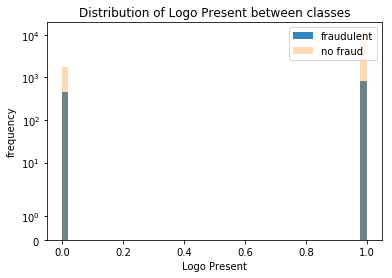

In [70]:
fraud = fraud_df['has_logo']
nofraud = nofraud_df['has_logo']
bins = np.linspace(0,1)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('Logo Present')
plt.ylabel('frequency')
plt.title('Distribution of Logo Present between classes')
plt.show()

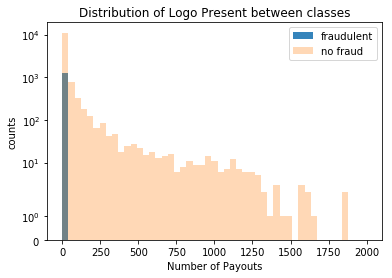

In [187]:
fraud = fraud_df['num_payouts']
nofraud = nofraud_df['num_payouts']
bins = np.linspace(0,2000)
plt.hist(fraud, bins, alpha=0.9, label='fraudulent')
plt.hist(nofraud, bins, alpha=0.3, label='no fraud')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.xlabel('Number of Payouts')
plt.ylabel('counts')
plt.title('Distribution of Logo Present between classes')
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

#### NLP 

In [72]:
df.fraud.value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [76]:
# strip out all HTML
from bs4 import BeautifulSoup
df['description'] = df.description.apply(lambda x: BeautifulSoup(x).text)

In [174]:
df.description

0        \n \nParty Starz Entertaintment & Diverse Inte...
1        Join us for a quick, one-night, community-buil...
2        Teacher Training on the Desired Results Develo...
3        Affiliations are now due in respect of the 201...
4        Writers and filmmakers need to understand thei...
5        Come join the Bluegrass Stallions as they take...
6                                                   \n \n 
7        WHEN JEKYLL MET HYDE\nThe Magnetic Theatre in ...
8        Merchants Exchange Productions and \nthe Julia...
9        WHEN JEKYLL MET HYDE\nThe Magnetic Theatre in ...
10       What are some potential warning signs of abuse...
11       monkeyface eel champion, blogger and street pe...
12       \n\n\n\n\nYou’ve got a profile on LinkedIn – N...
13       Enchantment: The Art of Changing Hearts, Minds...
14       Top celebrity & editorial stylists Ilaria Urbi...
15       \n\n\n\n\n"An education film that gets it"Wash...
16       \n\n\n\n\n"An education film that gets it"Wash.

### CountVectorizer

In [175]:
X_train, X_val, y_train, y_val = train_test_split(df['description'],df['fraud'])


In [176]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.fit_transform(y_val)

In [179]:
count_vect = CountVectorizer()
count_vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [180]:
X_train_count = count_vect.transform(X_train)
X_val_count = count_vect.transform(X_val)

### 

In [77]:
#feature vectorization
vectorize = TfidfVectorizer(lowercase=True, stop_words='english',
                          max_features=5000, ngram_range=(1,3))
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0)

In [160]:
# np.bincount(y)

,0
0,"(0, 3346)\t0.21763636853334473\n (0, 1519)\..."
1,"(0, 4183)\t0.1328751456087362\n (0, 3131)\t..."
2,"(0, 2327)\t0.0393441727104301\n (0, 137)\t0..."
3,"(0, 2495)\t0.04508205285404109\n (0, 2912)\..."
4,"(0, 3346)\t0.03872670694611755\n (0, 4414)\..."
5,"(0, 2576)\t0.2131311621866112\n (0, 1115)\t..."
6,
7,"(0, 3542)\t0.09235887932213196\n (0, 1099)\..."
8,"(0, 1697)\t0.07203120649169771\n (0, 1903)\..."
9,"(0, 3542)\t0.09235887932213196\n (0, 1099)\..."


In [83]:
X = vectorize.fit_transform(df.description)
y = df.fraud

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=5,
                           random_state=29, oob_score=True, n_jobs=-1)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=29, verbose=0, warm_start=False)

In [85]:
print(len(y))
print(np.bincount(y))

14337
[13044  1293]


In [89]:
str(1293/14337 * 100) + ' % of values are positive for fraud'

'9.01862314291693 % of values are positive for fraud'

In [28]:
rf.oob_score_

0.9114180093464462

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [142]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [181]:
X_train

3371     Our special guest Ray Pennings is Senior Fello...
6403     Professional Development\n \nAugust Technical ...
4408     We are hosting an open bar Beverly Hills Pool ...
2321     2013 NorthEast CS SoftDent Users\n Study Club\...
10026             \n \nPlease join us for a benefit to ...
8322     This is a fashion show to see the latest ideas...
10910    On Saturday, July 20th DiversiTech hosts young...
10914    The ServSafe® program provides food safety tra...
3948     7:30 - 8:30 a.m. Registration/Breakfast\n8:30 ...
6734     London School of Business and Finance\nSpecial...
8819     Corps Bara Dance Theatre Presents:\n"Prodigal"...
12879    Have you inherited a Drupal site? You may be w...
4542     Registration is now closed. Please contact Reb...
10720    Dinner with Stacey Currie\nTuesday 28 August, ...
8724     \nSaturday Oct 20th $40 6:30pm\nI don't paint ...
8327     Always wanted to write a book but don’t know w...
3881     AGES: 21+ ONLY NO REFUNDS | ALL SALES FINAL\nT.

In [143]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [154]:
y_pred= nb.predict(X_test)

In [145]:
conf_mat = confusion_matrix(y_test, y_pred)

In [149]:
precision_score(y_test,y_pred)

0.18214285714285713

In [150]:
recall_score(y_test,y_pred)

0.770392749244713

In [169]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, precision_recall_fscore_support, f1_score


In [151]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/claudiostaub/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
y_pred_rf = rf.predict(X_test)

In [156]:
confusion_matrix(y_test, y_pred_rf)

array([[3237,   17],
       [ 273,   58]])

In [157]:
recall_score(y_test, y_pred_rf)

0.17522658610271905

In [158]:
precision_score(y_test, y_pred_rf)

0.7733333333333333

In [162]:
from sklearn.ensemble import GradientBoostingClassifier


In [163]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, 
                                max_depth=3, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [164]:
y_pred_gbc = gbc.predict(X_test)

In [165]:
confusion_matrix(y_test, y_pred_gbc)

array([[3252,    2],
       [ 320,   11]])

In [166]:
recall_score(y_test, y_pred_gbc)

0.03323262839879154

In [167]:
precision_score(y_test, y_pred_gbc)

0.8461538461538461

In [170]:
classification_report(y_test, y_pred_gbc)

'              precision    recall  f1-score   support\n\n       False       0.91      1.00      0.95      3254\n        True       0.85      0.03      0.06       331\n\n   micro avg       0.91      0.91      0.91      3585\n   macro avg       0.88      0.52      0.51      3585\nweighted avg       0.90      0.91      0.87      3585\n'

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = P